手工计算Bellman方程示例
考虑状态(1,1)，它是一个陷阱位置:
- 即时奖励: -5
- 可能的动作: up, down, left, right
- 折扣因子γ = 0.9

假设相邻状态的价值:
  up: 2.0
  down: 3.0
  left: 1.5
  right: 4.0

应用Bellman方程: V(s) = max_a [R(s,a) + γ * V(s')]
  up: -5 + 0.9 × 2.0 = -3.20
  down: -5 + 0.9 × 3.0 = -2.30
  left: -5 + 0.9 × 1.5 = -3.65
  right: -5 + 0.9 × 4.0 = -1.40

最优价值: -1.40
最优动作: right

网格世界完整求解
环境设置:
- 网格大小: 4x4
- 起点: (0,0)
- 终点: (3,3), 奖励: +10
- 陷阱: (1,1), 奖励: -5
- 折扣因子: 0.9

开始价值迭代...
在第7次迭代后收敛

价值函数:
[[ 5.9   6.56  7.29  8.1 ]
 [ 6.56  7.29  8.1   9.  ]
 [ 7.29  8.1   9.   10.  ]
 [ 8.1   9.   10.    0.  ]]

最优策略:
['↓', '→', '↓', '↓']
['↓', '↓', '↓', '↓']
['↓', '↓', '↓', '↓']
['→', '→', '→', 'GOAL']


/tmp/ipykernel_177689/3665718527.py:167: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/3665718527.py:167: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/3665718527.py:167: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/3665718527.py:167: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/3665718527.py:167: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/3665718527.py:167: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/3665718527.py:167: UserWarning: Glyph 26368 (\N{CJK UN

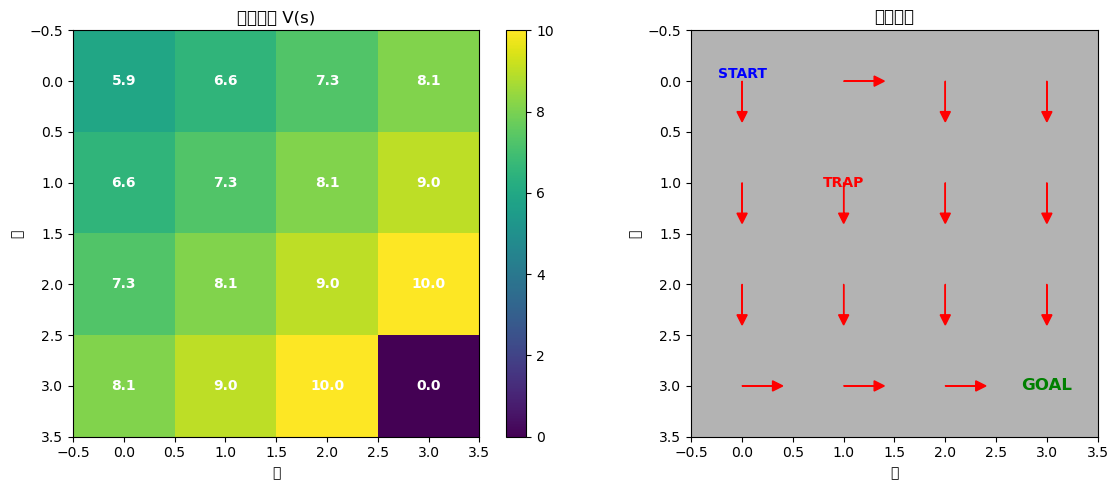


Bellman方程核心思想总结:
1. 当前状态的最优价值 = 即时奖励 + 折扣后的未来最优价值
2. 通过迭代更新所有状态的价值函数
3. 收敛后得到最优策略和价值函数


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class GridWorld:
    """
    简单的网格世界环境
    4x4网格，目标是从起点(0,0)到达终点(3,3)
    """
    def __init__(self):
        self.size = 4
        self.states = [(i, j) for i in range(self.size) for j in range(self.size)]
        self.actions = ['up', 'down', 'left', 'right']
        self.gamma = 0.9  # 折扣因子
        
        # 设置奖励
        self.rewards = np.zeros((self.size, self.size))
        self.rewards[3, 3] = 10  # 目标位置获得高奖励
        self.rewards[1, 1] = -5  # 陷阱位置获得负奖励
        
        # 终止状态
        self.terminal_states = [(3, 3)]
    
    def get_next_state(self, state, action):
        """根据当前状态和动作获取下一个状态"""
        i, j = state
        
        if action == 'up':
            next_state = (max(0, i-1), j)
        elif action == 'down':
            next_state = (min(self.size-1, i+1), j)
        elif action == 'left':
            next_state = (i, max(0, j-1))
        elif action == 'right':
            next_state = (i, min(self.size-1, j+1))
        
        return next_state
    
    def get_reward(self, state, action):
        """获取奖励"""
        next_state = self.get_next_state(state, action)
        return self.rewards[next_state[0], next_state[1]]
    
    def is_terminal(self, state):
        """判断是否为终止状态"""
        return state in self.terminal_states

class BellmanSolver:
    """使用价值迭代求解Bellman方程"""
    
    def __init__(self, env):
        self.env = env
        self.V = np.zeros((env.size, env.size))  # 价值函数
        self.policy = np.empty((env.size, env.size), dtype=object)  # 策略
    
    def value_iteration(self, max_iterations=100, tolerance=1e-6):
        """价值迭代算法"""
        print("开始价值迭代...")
        
        for iteration in range(max_iterations):
            old_V = self.V.copy()
            
            # 对每个状态应用Bellman方程
            for i in range(self.env.size):
                for j in range(self.env.size):
                    state = (i, j)
                    
                    if self.env.is_terminal(state):
                        continue
                    
                    # 计算所有动作的价值
                    action_values = []
                    for action in self.env.actions:
                        next_state = self.env.get_next_state(state, action)
                        reward = self.env.get_reward(state, action)
                        
                        # Bellman方程: V(s) = R(s,a) + γ * V(s')
                        value = reward + self.env.gamma * self.V[next_state[0], next_state[1]]
                        action_values.append(value)
                    
                    # 选择最大价值
                    self.V[i, j] = max(action_values)
                    # 记录最优动作
                    best_action_idx = np.argmax(action_values)
                    self.policy[i, j] = self.env.actions[best_action_idx]
            
            # 检查收敛
            if np.max(np.abs(self.V - old_V)) < tolerance:
                print(f"在第{iteration+1}次迭代后收敛")
                break
        
        return self.V, self.policy
    
    def print_results(self):
        """打印结果"""
        print("\n价值函数:")
        print(np.round(self.V, 2))
        
        print("\n最优策略:")
        for i in range(self.env.size):
            row = []
            for j in range(self.env.size):
                if (i, j) in self.env.terminal_states:
                    row.append("GOAL")
                else:
                    action = self.policy[i, j]
                    if action == 'up':
                        row.append("↑")
                    elif action == 'down':
                        row.append("↓")
                    elif action == 'left':
                        row.append("←")
                    elif action == 'right':
                        row.append("→")
            print(row)
    
    def visualize(self):
        """可视化结果"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # 价值函数热图
        im1 = ax1.imshow(self.V, cmap='viridis')
        ax1.set_title('价值函数 V(s)')
        ax1.set_xlabel('列')
        ax1.set_ylabel('行')
        
        # 添加数值标签
        for i in range(self.env.size):
            for j in range(self.env.size):
                ax1.text(j, i, f'{self.V[i, j]:.1f}', 
                        ha='center', va='center', color='white', fontweight='bold')
        
        plt.colorbar(im1, ax=ax1)
        
        # 策略可视化
        ax2.imshow(np.zeros((self.env.size, self.env.size)), cmap='gray', alpha=0.3)
        ax2.set_title('最优策略')
        ax2.set_xlabel('列')
        ax2.set_ylabel('行')
        
        # 绘制箭头
        for i in range(self.env.size):
            for j in range(self.env.size):
                if (i, j) not in self.env.terminal_states:
                    action = self.policy[i, j]
                    if action == 'up':
                        ax2.arrow(j, i, 0, -0.3, head_width=0.1, head_length=0.1, fc='red', ec='red')
                    elif action == 'down':
                        ax2.arrow(j, i, 0, 0.3, head_width=0.1, head_length=0.1, fc='red', ec='red')
                    elif action == 'left':
                        ax2.arrow(j, i, -0.3, 0, head_width=0.1, head_length=0.1, fc='red', ec='red')
                    elif action == 'right':
                        ax2.arrow(j, i, 0.3, 0, head_width=0.1, head_length=0.1, fc='red', ec='red')
                else:
                    ax2.text(j, i, 'GOAL', ha='center', va='center', 
                            fontweight='bold', color='green', fontsize=12)
        
        # 标记特殊位置
        ax2.text(0, 0, 'START', ha='center', va='bottom', 
                fontweight='bold', color='blue', fontsize=10)
        ax2.text(1, 1, 'TRAP', ha='center', va='center', 
                fontweight='bold', color='red', fontsize=10)
        
        ax2.set_xlim(-0.5, self.env.size-0.5)
        ax2.set_ylim(-0.5, self.env.size-0.5)
        ax2.invert_yaxis()
        
        plt.tight_layout()
        plt.show()

# 演示Bellman方程的手工计算
def manual_bellman_example():
    """手工计算一个简单状态的Bellman方程"""
    print("=" * 50)
    print("手工计算Bellman方程示例")
    print("=" * 50)
    
    print("考虑状态(1,1)，它是一个陷阱位置:")
    print("- 即时奖励: -5")
    print("- 可能的动作: up, down, left, right")
    print("- 折扣因子γ = 0.9")
    print()
    
    # 假设相邻状态的价值
    V_neighbors = {
        'up': 2.0,    # (0,1)的价值
        'down': 3.0,  # (2,1)的价值  
        'left': 1.5,  # (1,0)的价值
        'right': 4.0  # (1,2)的价值
    }
    
    print("假设相邻状态的价值:")
    for action, value in V_neighbors.items():
        print(f"  {action}: {value}")
    print()
    
    print("应用Bellman方程: V(s) = max_a [R(s,a) + γ * V(s')]")
    action_values = {}
    for action, next_value in V_neighbors.items():
        value = -5 + 0.9 * next_value
        action_values[action] = value
        print(f"  {action}: -5 + 0.9 × {next_value} = {value:.2f}")
    
    best_action = max(action_values, key=action_values.get)
    best_value = action_values[best_action]
    
    print(f"\n最优价值: {best_value:.2f}")
    print(f"最优动作: {best_action}")

# 主程序
if __name__ == "__main__":
    # 手工计算示例
    manual_bellman_example()
    
    print("\n" + "=" * 50)
    print("网格世界完整求解")
    print("=" * 50)
    
    # 创建环境和求解器
    env = GridWorld()
    solver = BellmanSolver(env)
    
    print("环境设置:")
    print(f"- 网格大小: {env.size}x{env.size}")
    print(f"- 起点: (0,0)")
    print(f"- 终点: (3,3), 奖励: +10")
    print(f"- 陷阱: (1,1), 奖励: -5")
    print(f"- 折扣因子: {env.gamma}")
    print()
    
    # 求解
    V, policy = solver.value_iteration()
    
    # 显示结果
    solver.print_results()
    
    # 可视化（如果在支持matplotlib的环境中）
    try:
        solver.visualize()
    except:
        print("\n注意: 无法显示图形，请在支持matplotlib的环境中运行以查看可视化结果")
    
    print("\n" + "=" * 50)
    print("Bellman方程核心思想总结:")
    print("1. 当前状态的最优价值 = 即时奖励 + 折扣后的未来最优价值")
    print("2. 通过迭代更新所有状态的价值函数")
    print("3. 收敛后得到最优策略和价值函数")
    print("=" * 50)

Differential Dynamic Programming (DDP) 理论

1. 基本思想:
   DDP是动态规划的二阶扩展，用于求解非线性最优控制问题
   它在每次迭代中线性化动力学方程和二次化成本函数

2. 算法步骤:
   a) 反向传播 (Backward Pass):
      - 从终端时刻开始，反向计算价值函数
      - 计算最优控制增益 K(t) 和 k(t)
      - 使用二阶导数信息 (Hessian矩阵)

   b) 前向传播 (Forward Pass):
      - 应用控制增益更新控制序列
      - 使用线搜索确保成本下降
      - 重新模拟系统轨迹

3. 关键公式:
   价值函数: V(x,t) = min_u [l(x,u) + V(f(x,u), t+1)]
   控制律: u* = u + α⋅k + K⋅(x - x̄)
   其中 K 是反馈增益, k 是前馈增益

4. 优势:
   - 二次收敛速度 (比一阶方法快)
   - 能处理非线性系统
   - 提供最优反馈控制律

5. 应用领域:
   - 机器人运动规划
   - 自动驾驶轨迹优化
   - 航天器姿态控制
   - 游戏AI中的角色控制

DDP摆控制问题设置:
- 摆长: 1.0m
- 质量: 1.0kg
- 时间步长: 0.05s
- 时间步数: 50
- 目标: 倒立位置 [π, 0]

初始状态: [0.00, 0.00]
目标状态: [3.14, 0.00]

开始DDP求解...
初始成本: 2965.3045
迭代 1: 成本 = 2301.3312, α = 1.0
迭代 2: 成本 = 1879.0629, α = 1.0
迭代 3: 成本 = 1582.3782, α = 1.0
迭代 4: 成本 = 1171.8907, α = 1.0
迭代 5: 成本 = 995.5567, α = 0.5
迭代 6: 成本 = 878.3484, α = 1.0
迭代 7: 成本 = 699.1299, α = 1.0
迭代 8: 成本 = 684.1424, α = 1.0
迭代 9: 成本 = 678.5420, α = 1.0
迭代 10: 成本 = 675.5716, α = 1.0
迭

/tmp/ipykernel_177689/922186451.py:345: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/922186451.py:345: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/922186451.py:345: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/922186451.py:345: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/922186451.py:345: UserWarning: Glyph 36712 (\N{CJK UNIFIED IDEOGRAPH-8F68}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/922186451.py:345: UserWarning: Glyph 36857 (\N{CJK UNIFIED IDEOGRAPH-8FF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_177689/922186451.py:345: UserWarning: Glyph 30446 (\N{CJK UNIFIED I

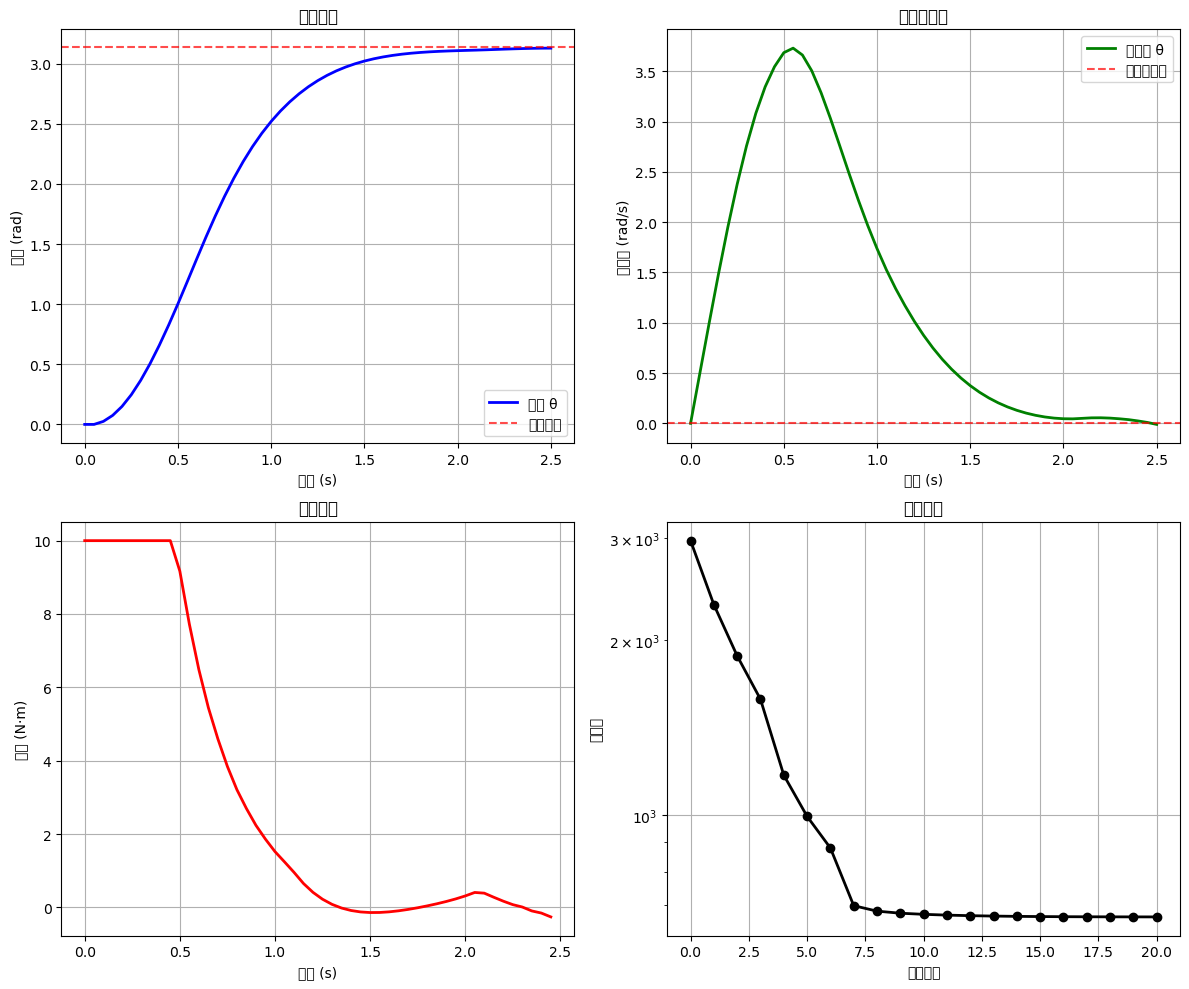

/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25670 (\N{CJK UNIFIED IDEOGRAPH-6446}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36816 (\N{CJK UNIFIED IDEOGRAPH-8FD0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/cor

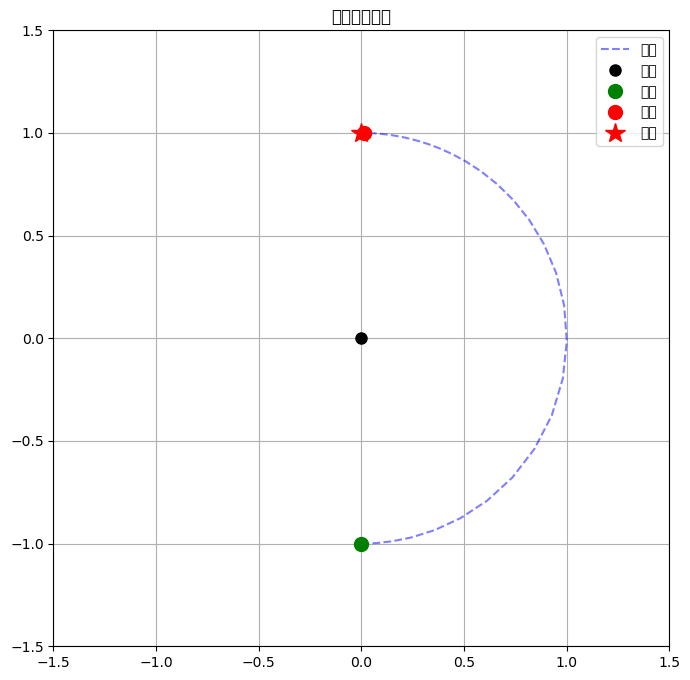


DDP vs 其他方法的比较:
- vs 动态规划: DDP能处理连续状态空间
- vs 梯度下降: DDP收敛更快(二次vs线性)
- vs MPC: DDP提供全局最优解
- vs LQR: DDP能处理非线性系统


In [2]:
#DDp

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

class SimpleDDP:
    """
    简单的DDP实现 - 求解一维摆的摆动控制问题
    
    系统动力学: 
    - 状态: [角度θ, 角速度θ̇]
    - 控制: 扭矩 u
    - 动力学: θ̈ = -g/L * sin(θ) + u/(mL²)
    
    目标: 将摆从初始位置摆动到倒立位置并保持平衡
    """
    
    def __init__(self):
        # 物理参数
        self.g = 9.81      # 重力加速度
        self.L = 1.0       # 摆长
        self.m = 1.0       # 质量
        self.dt = 0.05     # 时间步长
        
        # 优化参数
        self.T = 50        # 时间步数
        self.max_iter = 20 # 最大迭代次数
        self.mu = 1.0      # 正则化参数
        
        # 状态和控制维度
        self.n_x = 2       # 状态维度 [θ, θ̇]
        self.n_u = 1       # 控制维度 [u]
        
        # 目标状态 (倒立摆)
        self.x_goal = np.array([np.pi, 0.0])
        
        print("DDP摆控制问题设置:")
        print(f"- 摆长: {self.L}m")
        print(f"- 质量: {self.m}kg") 
        print(f"- 时间步长: {self.dt}s")
        print(f"- 时间步数: {self.T}")
        print(f"- 目标: 倒立位置 [π, 0]")
        print()
    
    def dynamics(self, x, u):
        """
        系统动力学函数
        x = [θ, θ̇], u = [扭矩]
        返回: ẋ = [θ̇, θ̈]
        """
        theta, theta_dot = x[0], x[1]
        torque = u[0]
        
        # 单摆动力学方程
        theta_ddot = (-self.g/self.L * np.sin(theta) + 
                      torque/(self.m * self.L**2))
        
        return np.array([theta_dot, theta_ddot])
    
    def integrate(self, x, u):
        """
        使用Euler方法积分状态
        """
        x_dot = self.dynamics(x, u)
        return x + self.dt * x_dot
    
    def running_cost(self, x, u):
        """
        运行成本函数
        """
        # 状态成本 (偏离目标的惩罚)
        x_diff = x - self.x_goal
        Q = np.diag([10.0, 1.0])  # 位置权重更大
        state_cost = 0.5 * x_diff.T @ Q @ x_diff
        
        # 控制成本 (能量消耗)
        R = np.array([[0.1]])
        control_cost = 0.5 * u.T @ R @ u
        
        return state_cost + control_cost
    
    def terminal_cost(self, x):
        """
        终端成本函数
        """
        x_diff = x - self.x_goal
        Q_f = np.diag([100.0, 10.0])  # 终端权重更大
        return 0.5 * x_diff.T @ Q_f @ x_diff
    
    def compute_derivatives(self, x, u):
        """
        计算成本函数和动力学的导数 (数值微分)
        """
        eps = 1e-6
        
        # 动力学雅可比矩阵
        fx = np.zeros((self.n_x, self.n_x))
        fu = np.zeros((self.n_x, self.n_u))
        
        for i in range(self.n_x):
            x_plus = x.copy()
            x_plus[i] += eps
            x_minus = x.copy() 
            x_minus[i] -= eps
            fx[:, i] = (self.dynamics(x_plus, u) - self.dynamics(x_minus, u)) / (2*eps)
        
        for i in range(self.n_u):
            u_plus = u.copy()
            u_plus[i] += eps
            u_minus = u.copy()
            u_minus[i] -= eps
            fu[:, i] = (self.dynamics(x, u_plus) - self.dynamics(x, u_minus)) / (2*eps)
        
        # 成本函数导数
        lx = np.zeros(self.n_x)
        lu = np.zeros(self.n_u)
        lxx = np.zeros((self.n_x, self.n_x))
        luu = np.zeros((self.n_u, self.n_u))
        lux = np.zeros((self.n_u, self.n_x))
        
        l0 = self.running_cost(x, u)
        
        # 一阶导数
        for i in range(self.n_x):
            x_plus = x.copy()
            x_plus[i] += eps
            x_minus = x.copy()
            x_minus[i] -= eps
            lx[i] = (self.running_cost(x_plus, u) - self.running_cost(x_minus, u)) / (2*eps)
        
        for i in range(self.n_u):
            u_plus = u.copy()
            u_plus[i] += eps
            u_minus = u.copy()
            u_minus[i] -= eps
            lu[i] = (self.running_cost(x, u_plus) - self.running_cost(x, u_minus)) / (2*eps)
        
        # 二阶导数 (简化，使用对角近似)
        lxx = np.diag([10.0, 1.0])
        luu = np.array([[0.1]])
        lux = np.zeros((self.n_u, self.n_x))
        
        return fx, fu, lx, lu, lxx, luu, lux
    
    def backward_pass(self, X, U):
        """
        DDP反向传播
        计算价值函数和最优控制增益
        """
        # 初始化价值函数
        V = np.zeros(self.T + 1)
        Vx = np.zeros((self.T + 1, self.n_x))
        Vxx = np.zeros((self.T + 1, self.n_x, self.n_x))
        
        # 控制增益
        K = np.zeros((self.T, self.n_u, self.n_x))  # 反馈增益
        k = np.zeros((self.T, self.n_u))            # 前馈增益
        
        # 终端条件
        x_T = X[-1]
        V[-1] = self.terminal_cost(x_T)
        
        # 终端价值函数导数
        eps = 1e-6
        for i in range(self.n_x):
            x_plus = x_T.copy()
            x_plus[i] += eps
            x_minus = x_T.copy()
            x_minus[i] -= eps
            Vx[-1, i] = (self.terminal_cost(x_plus) - self.terminal_cost(x_minus)) / (2*eps)
        
        Vxx[-1] = np.diag([100.0, 10.0])  # 终端Hessian
        
        # 反向迭代
        for t in range(self.T-1, -1, -1):
            x_t = X[t]
            u_t = U[t]
            
            # 计算导数
            fx, fu, lx, lu, lxx, luu, lux = self.compute_derivatives(x_t, u_t)
            
            # 离散化动力学雅可比
            A = np.eye(self.n_x) + self.dt * fx
            B = self.dt * fu
            
            # Q函数导数
            Qx = lx + A.T @ Vx[t+1]
            Qu = lu + B.T @ Vx[t+1]
            Qxx = lxx + A.T @ Vxx[t+1] @ A
            Quu = luu + B.T @ Vxx[t+1] @ B
            Qux = lux + B.T @ Vxx[t+1] @ A
            
            # 正则化
            Quu_reg = Quu + self.mu * np.eye(self.n_u)
            
            # 计算增益
            try:
                K[t] = -solve(Quu_reg, Qux)
                k[t] = -solve(Quu_reg, Qu)
            except np.linalg.LinAlgError:
                print(f"警告: 在时间步{t}时矩阵奇异")
                K[t] = np.zeros((self.n_u, self.n_x))
                k[t] = np.zeros(self.n_u)
            
            # 更新价值函数
            V[t] = V[t+1] - 0.5 * k[t].T @ Quu @ k[t]
            Vx[t] = Qx + K[t].T @ Quu @ k[t] + K[t].T @ Qu + Qux.T @ k[t]
            Vxx[t] = Qxx + K[t].T @ Quu @ K[t] + K[t].T @ Qux + Qux.T @ K[t]
        
        return K, k, V[0]
    
    def forward_pass(self, X, U, K, k, alpha=1.0):
        """
        DDP前向传播
        应用控制增益更新轨迹
        """
        X_new = np.zeros_like(X)
        U_new = np.zeros_like(U)
        
        X_new[0] = X[0].copy()  # 初始状态不变
        cost_new = 0.0
        
        for t in range(self.T):
            # 计算新控制
            delta_x = X_new[t] - X[t]
            U_new[t] = U[t] + alpha * k[t] + K[t] @ delta_x
            
            # 限制控制幅度
            U_new[t] = np.clip(U_new[t], -10.0, 10.0)
            
            # 积分动力学
            X_new[t+1] = self.integrate(X_new[t], U_new[t])
            
            # 累积成本
            cost_new += self.running_cost(X_new[t], U_new[t])
        
        # 添加终端成本
        cost_new += self.terminal_cost(X_new[-1])
        
        return X_new, U_new, cost_new
    
    def solve(self, x0):
        """
        主要的DDP求解算法
        """
        print("开始DDP求解...")
        
        # 初始化轨迹
        X = np.zeros((self.T + 1, self.n_x))
        U = np.zeros((self.T, self.n_u))
        
        X[0] = x0
        
        # 随机初始控制序列
        U = np.random.normal(0, 1, (self.T, self.n_u)) * 0.1
        
        # 前向模拟初始轨迹
        for t in range(self.T):
            X[t+1] = self.integrate(X[t], U[t])
        
        # 计算初始成本
        cost = sum(self.running_cost(X[t], U[t]) for t in range(self.T))
        cost += self.terminal_cost(X[-1])
        
        costs = [cost]
        print(f"初始成本: {cost:.4f}")
        
        # DDP主循环
        for iteration in range(self.max_iter):
            # 反向传播
            K, k, V = self.backward_pass(X, U)
            
            # 线搜索
            best_alpha = 0
            best_cost = float('inf')
            best_X, best_U = None, None
            
            for alpha in [1.0, 0.5, 0.25, 0.1]:
                X_new, U_new, cost_new = self.forward_pass(X, U, K, k, alpha)
                
                if cost_new < best_cost:
                    best_alpha = alpha
                    best_cost = cost_new
                    best_X, best_U = X_new, U_new
            
            # 检查改进
            if best_cost < cost:
                X, U = best_X, best_U
                cost = best_cost
                costs.append(cost)
                
                print(f"迭代 {iteration+1}: 成本 = {cost:.4f}, α = {best_alpha}")
                
                # 收敛检查
                if len(costs) > 1 and abs(costs[-2] - costs[-1]) < 1e-6:
                    print("收敛!")
                    break
            else:
                print(f"迭代 {iteration+1}: 无改进")
                self.mu *= 2  # 增加正则化
        
        return X, U, costs
    
    def visualize_results(self, X, U, costs):
        """
        可视化结果
        """
        time = np.arange(self.T + 1) * self.dt
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        
        # 状态轨迹
        ax1.plot(time, X[:, 0], 'b-', linewidth=2, label='角度 θ')
        ax1.axhline(y=np.pi, color='r', linestyle='--', alpha=0.7, label='目标角度')
        ax1.set_xlabel('时间 (s)')
        ax1.set_ylabel('角度 (rad)')
        ax1.set_title('角度轨迹')
        ax1.legend()
        ax1.grid(True)
        
        ax2.plot(time, X[:, 1], 'g-', linewidth=2, label='角速度 θ̇')
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='目标角速度')
        ax2.set_xlabel('时间 (s)')
        ax2.set_ylabel('角速度 (rad/s)')
        ax2.set_title('角速度轨迹')
        ax2.legend()
        ax2.grid(True)
        
        # 控制输入
        control_time = np.arange(self.T) * self.dt
        ax3.plot(control_time, U[:, 0], 'r-', linewidth=2)
        ax3.set_xlabel('时间 (s)')
        ax3.set_ylabel('扭矩 (N⋅m)')
        ax3.set_title('控制输入')
        ax3.grid(True)
        
        # 成本收敛
        ax4.semilogy(costs, 'ko-', linewidth=2, markersize=6)
        ax4.set_xlabel('迭代次数')
        ax4.set_ylabel('总成本')
        ax4.set_title('成本收敛')
        ax4.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # 摆的动画可视化
        self.animate_pendulum(X)
    
    def animate_pendulum(self, X):
        """
        创建摆的动画
        """
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal')
        ax.grid(True)
        ax.set_title('摆的运动轨迹')
        
        # 绘制轨迹
        x_pos = self.L * np.sin(X[:, 0])
        y_pos = -self.L * np.cos(X[:, 0])
        
        ax.plot(x_pos, y_pos, 'b--', alpha=0.5, label='轨迹')
        ax.plot(0, 0, 'ko', markersize=8, label='支点')
        
        # 起始和结束位置
        ax.plot(x_pos[0], y_pos[0], 'go', markersize=10, label='起始')
        ax.plot(x_pos[-1], y_pos[-1], 'ro', markersize=10, label='结束')
        
        # 目标位置 (倒立)
        ax.plot(0, self.L, 'r*', markersize=15, label='目标')
        
        ax.legend()
        plt.show()

def ddp_theory_explanation():
    """
    DDP理论解释
    """
    print("=" * 60)
    print("Differential Dynamic Programming (DDP) 理论")
    print("=" * 60)
    print()
    
    print("1. 基本思想:")
    print("   DDP是动态规划的二阶扩展，用于求解非线性最优控制问题")
    print("   它在每次迭代中线性化动力学方程和二次化成本函数")
    print()
    
    print("2. 算法步骤:")
    print("   a) 反向传播 (Backward Pass):")
    print("      - 从终端时刻开始，反向计算价值函数")
    print("      - 计算最优控制增益 K(t) 和 k(t)")
    print("      - 使用二阶导数信息 (Hessian矩阵)")
    print()
    print("   b) 前向传播 (Forward Pass):")
    print("      - 应用控制增益更新控制序列")
    print("      - 使用线搜索确保成本下降")
    print("      - 重新模拟系统轨迹")
    print()
    
    print("3. 关键公式:")
    print("   价值函数: V(x,t) = min_u [l(x,u) + V(f(x,u), t+1)]")
    print("   控制律: u* = u + α⋅k + K⋅(x - x̄)")
    print("   其中 K 是反馈增益, k 是前馈增益")
    print()
    
    print("4. 优势:")
    print("   - 二次收敛速度 (比一阶方法快)")
    print("   - 能处理非线性系统")
    print("   - 提供最优反馈控制律")
    print()
    
    print("5. 应用领域:")
    print("   - 机器人运动规划")
    print("   - 自动驾驶轨迹优化") 
    print("   - 航天器姿态控制")
    print("   - 游戏AI中的角色控制")
    print()
    print("=" * 60)

# 主程序
if __name__ == "__main__":
    # 理论解释
    ddp_theory_explanation()
    
    # 创建DDP求解器
    ddp = SimpleDDP()
    
    # 初始状态 (摆向下)
    x0 = np.array([0.0, 0.0])  # [角度, 角速度]
    
    print(f"初始状态: [{x0[0]:.2f}, {x0[1]:.2f}]")
    print(f"目标状态: [{ddp.x_goal[0]:.2f}, {ddp.x_goal[1]:.2f}]")
    print()
    
    # 求解最优控制问题
    X_opt, U_opt, costs = ddp.solve(x0)
    
    print(f"\n求解完成!")
    print(f"最终角度: {X_opt[-1, 0]:.4f} rad ({X_opt[-1, 0]*180/np.pi:.2f}°)")
    print(f"最终角速度: {X_opt[-1, 1]:.4f} rad/s")
    print(f"最终成本: {costs[-1]:.4f}")
    
    # 分析结果
    angle_error = abs(X_opt[-1, 0] - np.pi)
    velocity_error = abs(X_opt[-1, 1] - 0.0)
    
    print(f"\n性能分析:")
    print(f"角度误差: {angle_error:.4f} rad ({angle_error*180/np.pi:.2f}°)")
    print(f"角速度误差: {velocity_error:.4f} rad/s")
    
    if angle_error < 0.1 and velocity_error < 0.5:
        print("✓ 成功达到目标!")
    else:
        print("✗ 未完全达到目标，可能需要调整参数")
    
    # 可视化结果
    try:
        ddp.visualize_results(X_opt, U_opt, costs)
    except:
        print("\n注意: 无法显示图形，请在支持matplotlib的环境中运行以查看可视化结果")
    
    print("\n" + "=" * 60)
    print("DDP vs 其他方法的比较:")
    print("- vs 动态规划: DDP能处理连续状态空间")
    print("- vs 梯度下降: DDP收敛更快(二次vs线性)")
    print("- vs MPC: DDP提供全局最优解")
    print("- vs LQR: DDP能处理非线性系统")
    print("=" * 60)